In [ ]:
#Artificial Neural Network(ANN)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#check availability of GPU
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
temp=df.drop('label',axis=1)
temp

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp.index

RangeIndex(start=0, stop=60000, step=1)

In [ ]:
temp[temp.index==0].values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
          0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
        255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
        214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0, 214, 222, 210, 213, 224

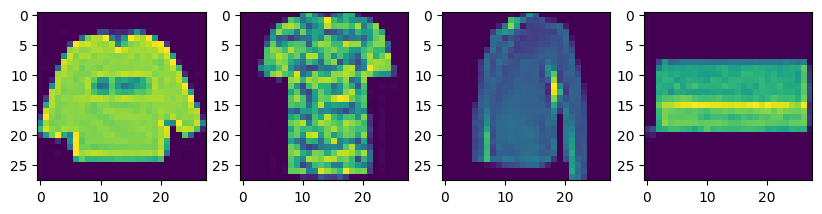

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(temp[temp.index==0].values.reshape(28,28))
plt.subplot(142)
plt.imshow(temp[temp.index==3].values.reshape(28,28))
plt.subplot(143)
plt.imshow(temp[temp.index==88].values.reshape(28,28))
plt.subplot(144)
plt.imshow(temp[temp.index==1000].values.reshape(28,28))

In [ ]:
x=df.drop('label', axis=1).values.astype(float)

In [ ]:
y=df['label'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
y_train

array([5, 7, 8, ..., 9, 4, 0])

In [ ]:
#Normalize the pixel values
x_train/=255.0
x_test/=255.0

In [ ]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [ ]:
xtrain_tensor=torch.tensor(x_train,dtype=torch.float32)
xtest_tensor=torch.tensor(x_test,dtype=torch.float32)
ytrain_tensor=torch.tensor(y_train,dtype=torch.long)
ytest_tensor=torch.tensor(y_test,dtype=torch.long)

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,x,y):
    self.features=x
    self.labels=y
  def __len__(self):
    return self.features.shape[0]
  def __getitem__(self,index):
    return self.features[index],self.labels[index]


In [ ]:
train_dataset = CustomDataset(xtrain_tensor, ytrain_tensor)

In [ ]:
test_dataset=CustomDataset(xtest_tensor,ytest_tensor)

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
import torch.nn as nn

In [ ]:
xtest_tensor.shape

torch.Size([12000, 784])

In [ ]:
#Model Defination
class Model(nn.Module):
  def __init__(self,features):
    super().__init__()
    self.network=nn.Sequential(
        nn.Linear(features.shape[1],128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,features):
    return self.network(features)

In [ ]:
#Model Instance Creation
model=Model(xtrain_tensor)
model=model.to(device)

In [ ]:
#parameters
learning_rate=0.1
epochs=100

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
#Model loop
for epoch in range(epochs):
  total_epoch_loss=0
  for train_batch,labels_batch in train_loader:
    #moving batch labels and data to gpu
    train_batch,labels_batch=train_batch.to(device),labels_batch.to(device)
    #forward pass
    y_pred=model(train_batch)

    #loss_calculation
    loss=loss_function(y_pred,labels_batch)

    #zero optimizer
    optimizer.zero_grad()

    #backward prop
    loss.backward()

    #update parameters
    optimizer.step()
    total_epoch_loss=total_epoch_loss + loss.item()
  avg_loss=total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch+1}, Loss: {avg_loss}')

Epoch: 1, Loss: 0.6426845972985029
Epoch: 2, Loss: 0.43420811027785144
Epoch: 3, Loss: 0.3871294580499331
Epoch: 4, Loss: 0.36094490660478673
Epoch: 5, Loss: 0.34002385913332306
Epoch: 6, Loss: 0.32218539395183327
Epoch: 7, Loss: 0.3077764087691903
Epoch: 8, Loss: 0.29659409397592146
Epoch: 9, Loss: 0.2848648186698556
Epoch: 10, Loss: 0.2757668308019638
Epoch: 11, Loss: 0.2657309058482448
Epoch: 12, Loss: 0.2602422612545391
Epoch: 13, Loss: 0.2521362596191466
Epoch: 14, Loss: 0.24461548876638214
Epoch: 15, Loss: 0.2379777300618589
Epoch: 16, Loss: 0.23041246980801225
Epoch: 17, Loss: 0.22605694945404928
Epoch: 18, Loss: 0.220773308865726
Epoch: 19, Loss: 0.21590805828447143
Epoch: 20, Loss: 0.21051730082184075
Epoch: 21, Loss: 0.2072604438830167
Epoch: 22, Loss: 0.20013695210404694
Epoch: 23, Loss: 0.1980528758826355
Epoch: 24, Loss: 0.19430693094494442
Epoch: 25, Loss: 0.1904829138852656
Epoch: 26, Loss: 0.18622254957755408
Epoch: 27, Loss: 0.1823266887969027
Epoch: 28, Loss: 0.175536

In [ ]:
model.eval()

Model(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total=0
correct=0
with torch.no_grad():
  for test_batch,test_labels in test_loader:
    test_batch,test_labels=test_batch.to(device),test_labels.to(device)
    output=model(test_batch)
    _, predicted=torch.max(output,1)
    total=total+test_labels.shape[0]
    correct=correct + (predicted==test_labels).sum().item()

print(correct/total)

0.88525
